# Hackaton Santander

## Objetivo
### O código a seguir tem como finalidade encontrar caracteristicas que se destaquem no publico alvo afim de definirmos uma persona para o nosso problema

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

## Base de dados

Os dados a seguir foram extraidos do IBGE: https://www.ibge.gov.br/estatisticas/sociais/trabalho/27946-divulgacao-semanal-pnadcovid1.html?=&t=downloads
Base utilizada foi: PNAD_COVID_062020.xlsx

In [2]:
df = pd.read_excel('BASE_PERSONA.xlsx')

In [3]:
df.shape

(270, 16)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Situação do domicílio,Tipo de área,Condição no domicílio,Idade do morador,Sexo,Cor ou raça,Escolaridade,trabalhou ou fez algum bico?,Tem mais de um trabalho,No trabalho qual sua posição?,"Quantas horas, por semana, trabalhava?",Recebia/retirava normalmente em dinheiro,Valor em dinheiro,Valor em dinheiro sacado,O(A) Sr(a) contribui para o INSS?,Este domicílio é:
0,1,1,1,78,1,1,5,1,2,7,40,1.0,10000.0,10000.0,1,1
1,1,1,1,36,2,4,5,2,2,7,50,1.0,13000.0,0.0,2,3
2,1,1,2,61,2,1,3,1,2,7,40,1.0,2100.0,1500.0,1,1
3,1,1,2,55,1,3,7,1,2,7,40,1.0,2000.0,0.0,2,3
4,1,1,2,45,2,1,5,1,2,7,40,1.0,2250.0,0.0,1,1


### Tratamento de dados

In [6]:
df.isna().sum().sort_values(ascending=False)

Valor em dinheiro sacado                    8
Valor em dinheiro                           8
Recebia/retirava normalmente em dinheiro    8
Este domicílio é:                           0
O(A) Sr(a) contribui para o INSS?           0
Quantas horas, por semana, trabalhava?      0
No trabalho qual sua posição?               0
Tem mais de um trabalho                     0
trabalhou ou fez algum bico?                0
Escolaridade                                0
Cor ou raça                                 0
Sexo                                        0
Idade do morador                            0
Condição no domicílio                       0
Tipo de área                                0
Situação do domicílio                       0
dtype: int64

In [7]:
df['Recebia/retirava normalmente em dinheiro'].unique()

array([ 1., nan])

In [8]:
df['Recebia/retirava normalmente em dinheiro'].fillna(0, inplace=True)
df['Valor em dinheiro'].fillna(0, inplace=True)
df['Valor em dinheiro sacado'].fillna(0, inplace=True)

Como as demais informações estão preenchidas podemos subentender que a ausência de informação caracteriza um valor de recebimento ou saque igual a zero.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Situação do domicílio                     270 non-null    int64  
 1   Tipo de área                              270 non-null    int64  
 2   Condição no domicílio                     270 non-null    int64  
 3   Idade do morador                          270 non-null    int64  
 4   Sexo                                      270 non-null    int64  
 5   Cor ou raça                               270 non-null    int64  
 6   Escolaridade                              270 non-null    int64  
 7   trabalhou ou fez algum bico?              270 non-null    int64  
 8   Tem mais de um trabalho                   270 non-null    int64  
 9   No trabalho qual sua posição?             270 non-null    int64  
 10  Quantas horas, por semana, trabalhava?

### Feature Engineering

##### Agrupamento da escolaridade
* 1	- Sem instrução;
* 2	- Fundamental incompleto;
* 3	- Fundamental completa;
* 4	- Médio incompleto;
* 5	- Médio completo.

In [10]:
df['Escolaridade'] = df['Escolaridade'].apply(lambda x: 5 if x in {1, 2, 3, 4, 5} else x)

##### Transformação do atributo, removendo a capital da variável categórica 4 para deixá-la apenas com os dados do interior:
* 1	- Capital;
* 2	- Resto da RM (Região Metropolitana, excluindo a capital);
* 3	- Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital) ;
* 4	- Resto da UF  (Unidade da Federação, excluindo a região metropolitana e a RIDE).

##### Característica Geográfica:
   * Capital - 1521.11 km²
   * Região Metropolitana - 7946.84 km²
   * Interior - 240262.59 km²

In [11]:
df['Localização'] = df['Tipo de área'].apply(lambda x: round(1521.11/df.where(df['Tipo de área'] == 1)['Tipo de área'].count()) if x == 1 else
                                            (round(7946.84/df.where(df['Tipo de área'] == 2)['Tipo de área'].count()) if x == 2 else 
                                            (round(240262.59/df.where(df['Tipo de área'] == 4)['Tipo de área'].count())
                                                          )))

##### Razão de comércios Capital x Interior

In [12]:
qtd_capital_km2 = 1521.11/df.where(df['Tipo de área'] == 1)['Tipo de área'].count()
qtd_interior_km2 = 240262.59/df.where(df['Tipo de área'] == 4)['Tipo de área'].count()
qtd_interior_km2/qtd_capital_km2

60.60954469754569

Capital possui uma concentração 57x maior de comercios do segmento de lojas e atacado

### Analisando Variáveis Contínuas

In [13]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sn.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantils')

    # boxplot
    plt.subplot(1, 3, 3)
    sn.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### Analisando a distribuição da Idade do morador

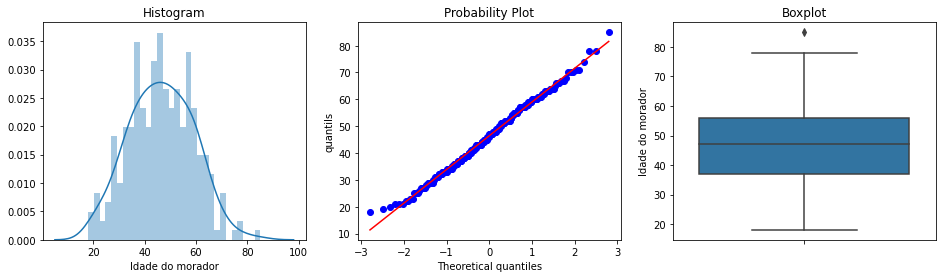

In [14]:
diagnostic_plots(df, 'Idade do morador')

#### Analisando a distribuição da quantidade de horas trabalhadas por semana

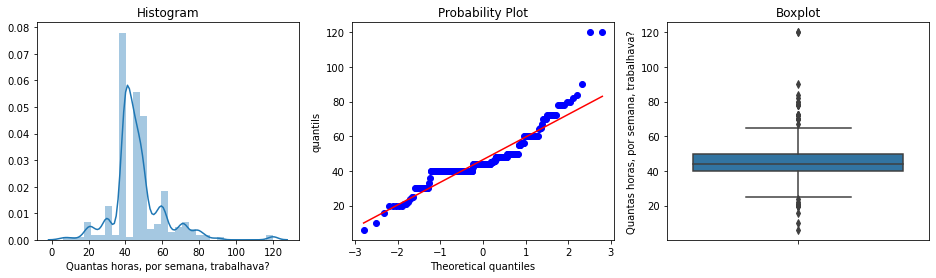

In [15]:
diagnostic_plots(df, 'Quantas horas, por semana, trabalhava?')

#### Analisando a distribuição do valor recebido em dinheiro

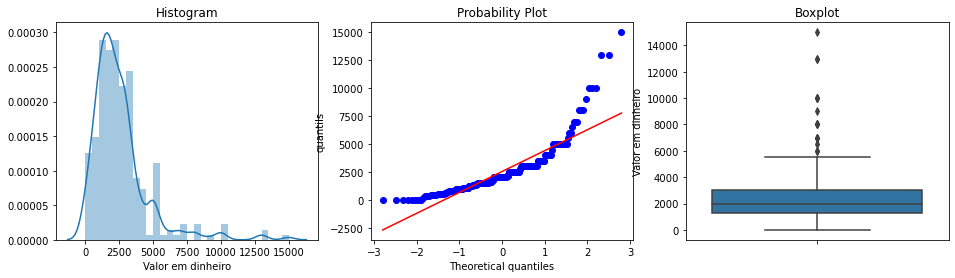

In [16]:
diagnostic_plots(df, 'Valor em dinheiro')

#### Analisando a distribuição do valor sacado em dinheiro

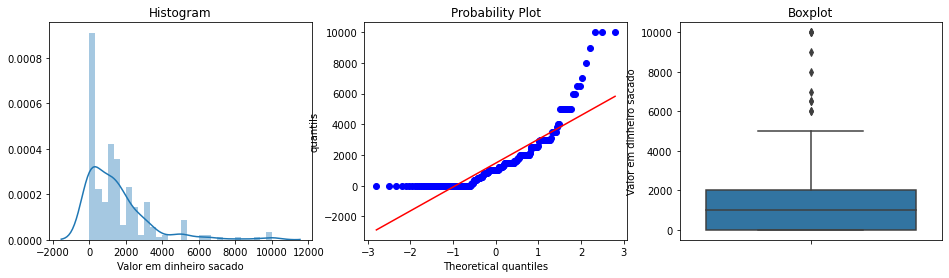

In [17]:
diagnostic_plots(df, 'Valor em dinheiro sacado')

### Analisando a distribuição da Idade do morador

In [18]:
num = ['Idade do morador','Quantas horas, por semana, trabalhava?','Valor em dinheiro','Valor em dinheiro sacado']
df[num].describe()

,Idade do morador,"Quantas horas, por semana, trabalhava?",Valor em dinheiro,Valor em dinheiro sacado
count,270.000000,270.000000,270.000000,270.000000
mean,46.459259,46.511111,2532.933333,1473.155556
std,12.489855,13.988507,2114.921656,1772.309265
min,18.000000,6.000000,0.000000,0.000000
25%,37.000000,40.000000,1300.000000,0.000000
50%,47.000000,44.000000,2000.000000,1000.000000
75%,56.000000,50.000000,3000.000000,2000.000000
max,85.000000,120.000000,15000.000000,10000.000000


### Analisando Variáveis Categóricas

##### Variável - Situação do domicilio
* 1	- Urbana
* 2 - Rural

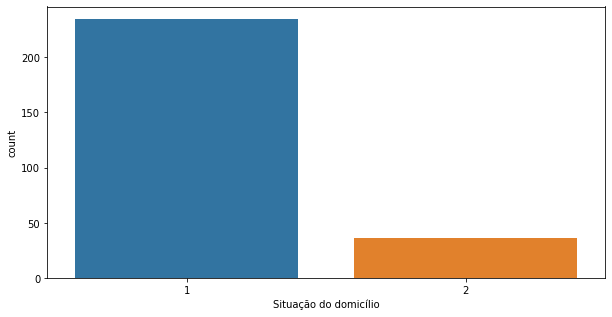

In [19]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Situação do domicílio', data = df)

#####  Variável - Tipo de área
* 1	- Capital
* 2 - Resto da RM (Região Metropolitana, excluindo a capital)
* 4 - Resto da UF

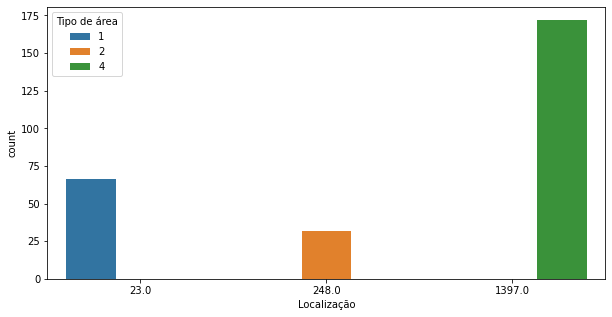

In [20]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Localização', hue='Tipo de área', data = df)

##### Variável - Condição no domicílio
* 1	- Pessoa responsável pelo domicílio
* 2 - Cônjuge ou companheiro(a) de sexo diferente
* 4 - Filho(a) do responsável e do cônjuge
* 5 - Filho(a) somente do responsável
* 6 - Filho(a) somente do cônjuge
* 7 - Genro ou nora
* 8 - Pai, mãe, padastro ou madastra
* 10 - Neto(a)
* 12 - Irmão ou irmã
* 14 - Outro parente
* 16 - Convivente - Não parente que compartilha despesas

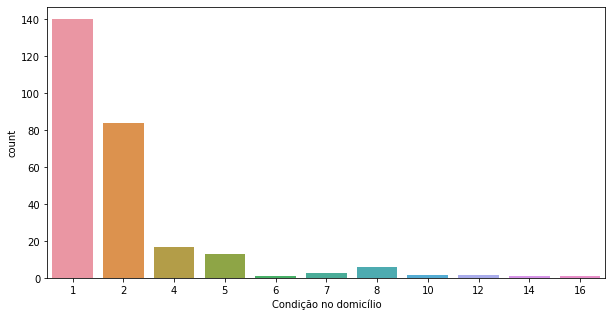

In [21]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Condição no domicílio', data = df)

##### Variável - Sexo
* 1 - Homem
* 2 - Mulher

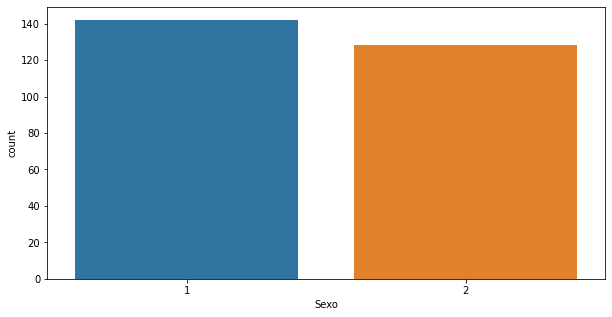

In [22]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Sexo', data = df)

##### Variável - Cor ou raça
* 1 - Branca
* 2 - Preta
* 3 - Amarela
* 4 - Parda

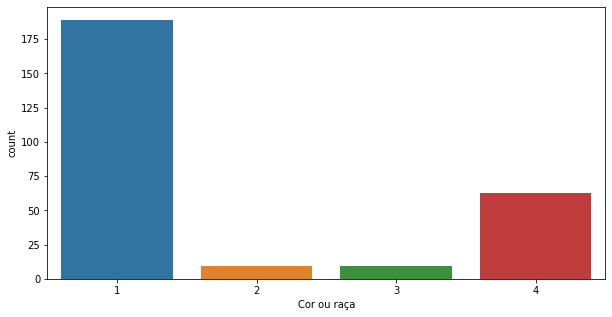

In [23]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Cor ou raça', data = df)

##### Variável - Escolaridade
* 5 - Médio completo
* 6 - Superior incompleto
* 7 - Superior completo
* 8 - Pós-graduação, mestrado ou doutorado

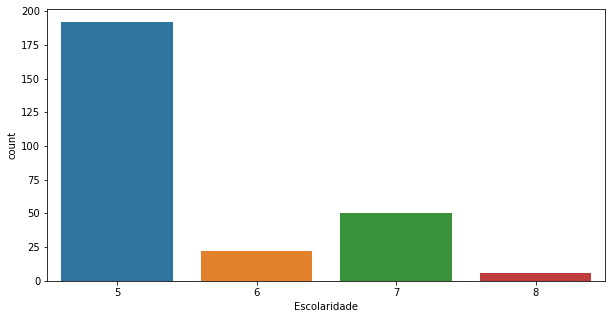

In [24]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Escolaridade', data = df)

##### Variável - trabalhou ou fez algum bico?
* 1 - Sim
* 2 - Não

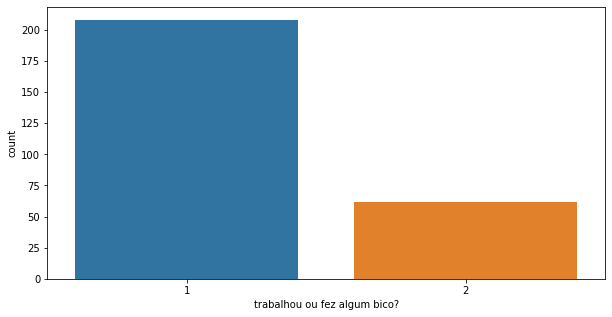

In [25]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'trabalhou ou fez algum bico?', data = df)

##### Variável - Tem mais de um trabalho
* 1 - Sim
* 2 - Não

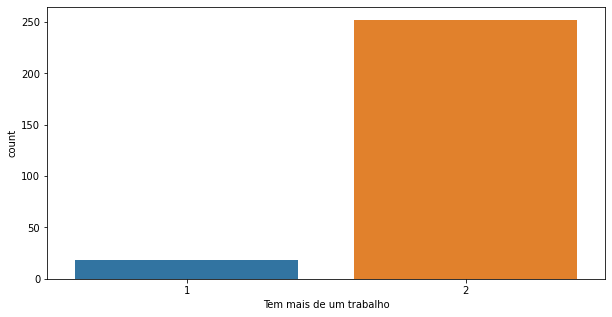

In [26]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Tem mais de um trabalho', data = df)

##### Variável - No trabalho qual sua posição?
* 6 - Empregador
* 7 - Conta Própria
* 8 - Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente

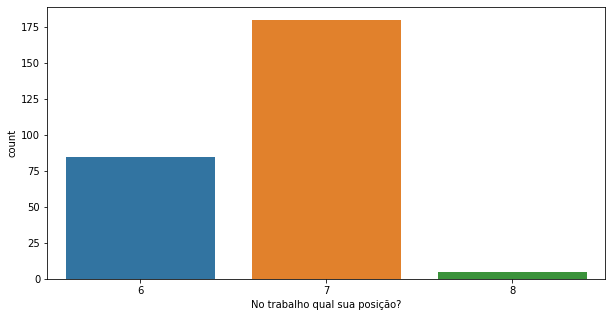

In [27]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'No trabalho qual sua posição?', data = df)

##### Variável - Recebia/retirava normalmente em dinheiro
* 1 - Em dinheiro

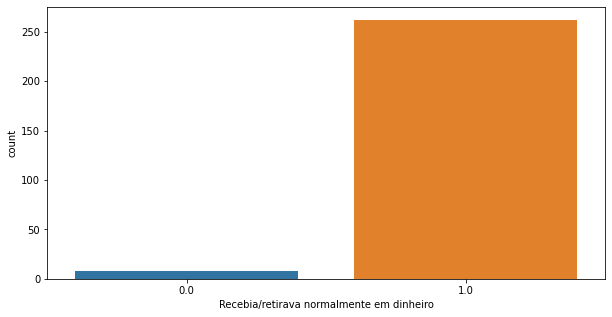

In [28]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Recebia/retirava normalmente em dinheiro', data = df)

##### Variável - O(A) Sr(a) contribui para o INSS?
* 1 - Sim
* 2 - Não

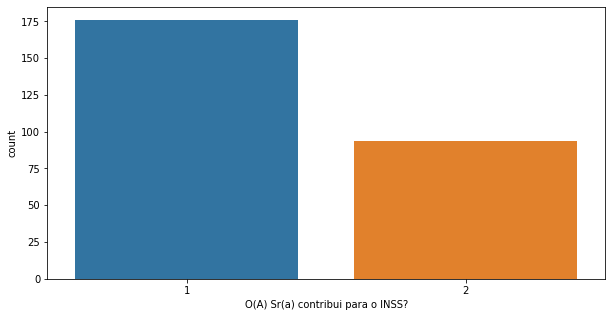

In [29]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'O(A) Sr(a) contribui para o INSS?', data = df)

##### Variável - Este domicílio é:
* 1 - Próprio - já pago
* 2 - Próprio - ainda pagando
* 3 - Alugado
* 4 - Cedido por empregador
* 5 - Cedido por familiar
* 6 - Cedido de outra forma
* 7 - Outra condição

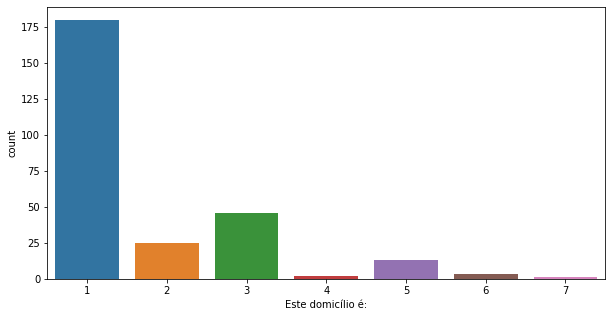

In [30]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Este domicílio é:', data = df)

Com o resultado dessa análise já conseguimos definir uma persona do nosso problema.

# Análise da Pesquisa Mensal de Comércio - PMC
### Tabela  6 - Indicadores de Receita Nominal de Vendas do Comércio Varejista Ampliado, segundo as atividades de divulgação - Variação (%)
A PMC investiga a receita bruta de revenda do mês de referência da pesquisa. A receita bruta de revenda é definida como a proveniente da revenda de mercadorias, sem deduções dos impostos e contribuições que incidem diretamente sobre essas receitas.
### Período de Junho/2018 à Maio/2020
##### Fonte: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html

### Importado os arquivos com intervalo de 3 meses, pois cada relatório mostra o resultado os últimos 3 meses.

In [31]:
# Importando o glob, para encontrar todos os nomes de caminho que correspondem a um padrão especificado 
import glob

# Obtendo os caminhos dos arquivos importados
all_files = glob.glob("pmc/*.xls")

# Listando os arquivos importados
all_files

['pmc\\pmc_201808_06.xls',
 'pmc\\pmc_201811_06.xls',
 'pmc\\pmc_201902_06.xls',
 'pmc\\pmc_201905_06.xls',
 'pmc\\pmc_201908_06.xls',
 'pmc\\pmc_201911_06.xls',
 'pmc\\pmc_202002_06.xls',
 'pmc\\pmc_202005_06.xls']

### Efetuando o tratamento do arquivo, obtendo as linhas por setor de atuação e as colunas mensais.

In [32]:
# Importando o pandas
import pandas as pd

li = []
for filename in all_files:
    df = pd.read_excel(filename, index_col=0, header=None)
    df = df[6:20]
    df = df.iloc[:, [3,4,5]].T
    li.append(df)
    
dataset = pd.concat(li, axis=0, ignore_index=True)

### Visualizando o dataset

In [33]:
dataset

,Receita de vendas do comércio varejista (5),1. Combustíveis e lubrificantes,"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",2.1. Hipermercados e supermercados,"3. Tecidos, vestuário e calçados",4. Móveis e eletrodomésticos,4.1. Móveis,4.2. Eletrodomésticos,"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos","6. Livros, jornais, revistas e papelaria","7. Equipamentos e materiais para escritório, informática e comunicação",8. Outros artigos de uso pessoal e doméstico,Receita de vendas do comércio varejista ampliado (6),"9. Veículos, motocicletas, partes e peças"
0,5.3,13.3,5.1,5,-2.7,-0.4,1,-1,6.7,-9.1,-5.7,9.5,6.7,11
1,2.9,13.9,2.7,2.7,-7.1,-7.5,-5.3,-8.6,7.4,-7.9,-6.7,5.7,5.8,17.2
2,7.6,11.7,8.2,8.9,4.2,-2.6,-1.7,-3,9.6,-9.7,0.5,10.9,9.7,16.9
3,4.2,11.7,3.7,3.9,2.3,-2.4,-1.7,-2.7,4.3,-12.8,-3.2,5.3,5.6,12.6
4,6.7,13.1,6.1,5.9,4.9,-0.5,1.2,-1.3,8.8,-26.8,1.9,9.4,9.9,21.3
5,8.4,9.3,7.6,7.9,5,4.5,2.1,5.5,9.1,-29.2,1.5,17.6,9.2,14
6,3.9,5.8,5.9,6,-0.9,-1.8,-2.9,-1.3,8.1,-20.9,-3.5,2.8,4.5,7.8
7,4.7,2.4,6.5,6.8,-0.9,1.2,2.7,0.6,7.8,-25.8,2.9,6.8,5.8,9.6
8,7.5,2.4,7.4,7.6,11.5,7.1,10.6,5.6,10.9,-20.5,5.3,11.9,10.4,20.1
9,0.2,-1.5,1.5,1.7,-4,-0.8,0.4,-1.3,4.5,-33.4,2.1,-1.5,0.3,-0.5


### Visualizando informações do dataset

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Receita de vendas do comércio varejista (5)                                 24 non-null     object
 1   1. Combustíveis e lubrificantes                                             24 non-null     object
 2   2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo       24 non-null     object
 3   2.1. Hipermercados e supermercados                                          24 non-null     object
 4   3. Tecidos, vestuário e calçados                                            24 non-null     object
 5   4. Móveis e eletrodomésticos                                                24 non-null     object
 6   4.1. Móveis                                                 

### Removendo as colunas de valores agrupados de setores, que não fazem sentido para essa análise

In [35]:
drop = ['Receita de vendas do comércio varejista (5)', 'Receita de vendas do comércio varejista ampliado (6)'] 
dataset.drop(columns=drop,axis=1,inplace=True)

### Convertendo os dados numéricos

In [36]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')

### Resumo estatístico do DataFrame

In [37]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
1. Combustíveis e lubrificantes,24.0,1.058333,12.207906,-33.6,-2.825,2.40,8.925,13.9
"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",24.0,6.670833,3.658638,1.5,4.450,5.90,7.750,16.3
2.1. Hipermercados e supermercados,24.0,6.925000,4.062367,1.7,4.575,5.95,8.150,17.9
"3. Tecidos, vestuário e calçados",24.0,-6.470833,22.212873,-80.7,-2.550,-0.55,3.925,11.5
4. Móveis e eletrodomésticos,24.0,0.962500,11.398772,-38.8,-2.450,2.05,9.625,17.6
4.1. Móveis,24.0,1.458333,12.616412,-43.1,-1.700,2.40,8.750,19.4
4.2. Eletrodomésticos,24.0,0.737500,11.137239,-36.8,-2.775,1.00,7.675,19.6
"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos",24.0,7.562500,5.264385,-9.9,6.850,8.75,10.325,15.9
"6. Livros, jornais, revistas e papelaria",24.0,-19.220833,18.104911,-68.7,-26.050,-12.95,-9.650,9.0


### Analisando os gráficos por setor

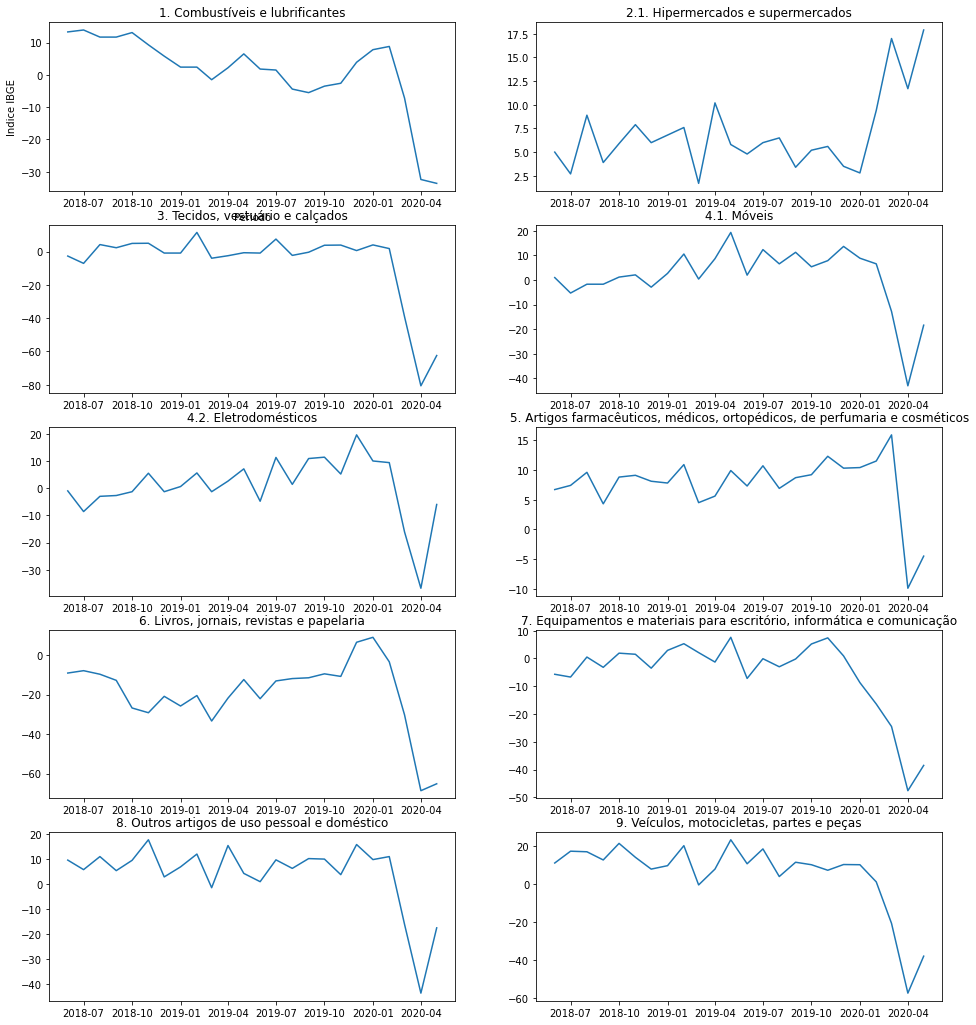

In [38]:
# importando o matplotlib
import matplotlib.pyplot as plt

# Incluindo o periodo de acordo com as datas dos arquivos
periodo = ['06/2018', '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018','01/2019', '02/2019', '03/2019','04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019', '01/2020', '02/2020', '03/2020','04/2020', '05/2020']
dataset['periodo'] = periodo

# ajustando o dataset para criar uma coluna do tipo "data" 
dataset['periodo'] = pd.to_datetime(dataset['periodo'])

plt.figure(figsize=(16, 18))

plt.subplot(5, 2, 1)
plt.plot(dataset['periodo'], dataset['1. Combustíveis e lubrificantes'])
plt.title('1. Combustíveis e lubrificantes')
plt.xlabel('Periodo')
plt.ylabel('Indice IBGE')

plt.subplot(5, 2, 2)
plt.plot(dataset['periodo'], dataset['2.1. Hipermercados e supermercados'])
plt.title('2.1. Hipermercados e supermercados')

plt.subplot(5, 2, 3)
plt.plot(dataset['periodo'], dataset['3. Tecidos, vestuário e calçados'])
plt.title('3. Tecidos, vestuário e calçados')

plt.subplot(5, 2, 4)
plt.plot(dataset['periodo'], dataset['4.1. Móveis'])
plt.title('4.1. Móveis')

plt.subplot(5, 2, 5)
plt.plot(dataset['periodo'], dataset['4.2. Eletrodomésticos'])
plt.title('4.2. Eletrodomésticos')

plt.subplot(5, 2, 6)
plt.plot(dataset['periodo'], dataset['5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos'])
plt.title('5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos')

plt.subplot(5, 2, 7)
plt.plot(dataset['periodo'], dataset['6. Livros, jornais, revistas e papelaria'])
plt.title('6. Livros, jornais, revistas e papelaria')

plt.subplot(5, 2, 8)
plt.plot(dataset['periodo'], dataset['7. Equipamentos e materiais para escritório, informática e comunicação'])
plt.title('7. Equipamentos e materiais para escritório, informática e comunicação')

plt.subplot(5, 2, 9)
plt.plot(dataset['periodo'], dataset['8. Outros artigos de uso pessoal e doméstico'])
plt.title('8. Outros artigos de uso pessoal e doméstico')
 
plt.subplot(5, 2, 10)
plt.plot(dataset['periodo'], dataset['9. Veículos, motocicletas, partes e peças'])
plt.title('9. Veículos, motocicletas, partes e peças')

plt.show()

### Analisando as correlações

In [39]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

0,1. Combustíveis e lubrificantes,"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",2.1. Hipermercados e supermercados,"3. Tecidos, vestuário e calçados",4. Móveis e eletrodomésticos,4.1. Móveis,4.2. Eletrodomésticos,"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos","6. Livros, jornais, revistas e papelaria","7. Equipamentos e materiais para escritório, informática e comunicação",8. Outros artigos de uso pessoal e doméstico,"9. Veículos, motocicletas, partes e peças"
0,,,,,,,,,,,,
1. Combustíveis e lubrificantes,1.000000,-0.579618,-0.606261,0.846161,0.546432,0.631521,0.483765,0.670417,0.762970,0.723975,0.795117,0.875377
"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",-0.579618,1.000000,0.998024,-0.662128,-0.475688,-0.514347,-0.444986,-0.227536,-0.610530,-0.658198,-0.515223,-0.646334
2.1. Hipermercados e supermercados,-0.606261,0.998024,1.000000,-0.691941,-0.508149,-0.547159,-0.475967,-0.270674,-0.642027,-0.681967,-0.545962,-0.673371
"3. Tecidos, vestuário e calçados",0.846161,-0.662128,-0.691941,1.000000,0.829036,0.878162,0.778391,0.735217,0.807293,0.925205,0.930737,0.956822
4. Móveis e eletrodomésticos,0.546432,-0.475688,-0.508149,0.829036,1.000000,0.958247,0.991217,0.672594,0.767125,0.775776,0.878098,0.773915
4.1. Móveis,0.631521,-0.514347,-0.547159,0.878162,0.958247,1.000000,0.913036,0.731892,0.784940,0.852369,0.875400,0.855617
4.2. Eletrodomésticos,0.483765,-0.444986,-0.475967,0.778391,0.991217,0.913036,1.000000,0.620467,0.732034,0.721815,0.852232,0.712962
"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos",0.670417,-0.227536,-0.270674,0.735217,0.672594,0.731892,0.620467,1.000000,0.747948,0.664936,0.679403,0.706842
"6. Livros, jornais, revistas e papelaria",0.762970,-0.610530,-0.642027,0.807293,0.767125,0.784940,0.732034,0.747948,1.000000,0.674488,0.782763,0.770803


### Comparando setores com correlações acima de 0.9

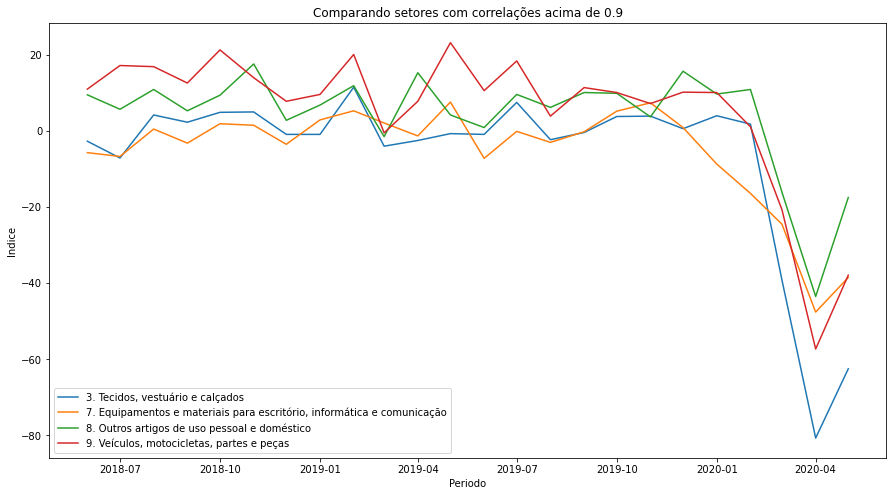

In [46]:
plt.figure(figsize = (15,8))
setor3, = plt.plot(dataset['periodo'], dataset['3. Tecidos, vestuário e calçados'])
setor7, = plt.plot(dataset['periodo'], dataset['7. Equipamentos e materiais para escritório, informática e comunicação'])
setor8, =  plt.plot(dataset['periodo'], dataset['8. Outros artigos de uso pessoal e doméstico'])
setor9, = plt.plot(dataset['periodo'], dataset['9. Veículos, motocicletas, partes e peças'])
plt.xlabel('Periodo')
plt.ylabel('Indice')
plt.title('Comparando setores com correlações acima de 0.9')

plt.legend([setor3, setor7, setor8, setor9], ['3. Tecidos, vestuário e calçados','7. Equipamentos e materiais para escritório, informática e comunicação','8. Outros artigos de uso pessoal e doméstico','9. Veículos, motocicletas, partes e peças'])

plt.show()

Pela análise do grafico, verifica-se que a maior queda no indice de consumo foi do setor de Tecidos, vestuários e calçados.

### Exportando os dados para visualização e análise no Tableau

In [41]:
dataset.to_csv("pmc.csv", sep=";", index=False)